# Análisis de Datos - Ejemplo: ENAHO

0. Importar todas las librerías que necesitaremos

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

### Carga de datos

1. Importar nuestra base de datos. Usaremos:

    a. 	Características de los Miembros del Hogar (Enaho01-2023-200)

In [ ]:
# Cargar los datos
df_miembros = pd.read_csv('data/enaho01_2023_200.csv', encoding='latin1')
print('Carga de datos completa')

Carga de datos completa


2. Visualizar los datos

In [16]:
# Mostrar las primeras n filas
df_miembros.head(5)

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,P201P,...,OCUPAC_R3,OCUPAC_R4,RAMA_R3,RAMA_R4,CODTAREA,CODTIEMPO,TICUEST01,FACPOB07,NCONGLOME,SUB_CONGLOME
0,2023,2,5007,22,11,1,10101,4,4,20190050070221101,...,,,,,,,2,50.466671,7070,0
1,2023,2,5007,22,11,2,10101,4,4,20190050070221102,...,,,,,,,2,50.466671,7070,0
2,2023,2,5007,22,11,3,10101,4,4,20190050070221104,...,,,,,,,2,50.466671,7070,0
3,2023,2,5007,31,11,1,10101,4,4,20190050070311102,...,,,,,,,2,50.466671,7070,0
4,2023,2,5007,31,11,2,10101,4,4,20230050070311102,...,,,,,,,2,50.466671,7070,0


    #   Mostrar el df completo
        df_miembros
    # Mostrar las últimas n filas
        df_miembros.head(5)

3. Mostrar el tipo de datos de nuestra base

In [15]:
df_miembros.dtypes

AÑO               int64
MES               int64
CONGLOME          int64
VIVIENDA          int64
HOGAR             int64
CODPERSO          int64
UBIGEO            int64
DOMINIO           int64
ESTRATO           int64
P201P             int64
P203              int64
P203A            object
P203B            object
P204             object
P205             object
P206             object
P207             object
P208A            object
P208B            object
P209             object
P210             object
P211A            object
P211D            object
P212             object
P213             object
P214             object
P215             object
P216             object
P217             object
T211             object
OCUPAC_R3        object
OCUPAC_R4        object
RAMA_R3          object
RAMA_R4          object
CODTAREA         object
CODTIEMPO        object
TICUEST01         int64
FACPOB07        float64
NCONGLOME         int64
SUB_CONGLOME      int64
dtype: object

4. Desarrollar un resumen estadístico

In [13]:
df_miembros.describe() ## Solo describe lascolumnnas con tipos de datos numéricos
df_miembros.describe(include='all') ## Describe todo tipo de columnas. Se agregan tres columnas:
        # unique[número de objetos distintos]
        # top[objeto que más se repite]
        # freq[número de veces que más se repite])

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,P201P,...,OCUPAC_R3,OCUPAC_R4,RAMA_R3,RAMA_R4,CODTAREA,CODTIEMPO,TICUEST01,FACPOB07,NCONGLOME,SUB_CONGLOME
count,119747.0,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,1.197470e+05,...,119747,119747,119747,119747,119747,119747,119747.0,119747.000000,119747.000000,119747.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72,85,86,126,3,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113043,113043,113043,113043,113043,113043,NaN,NaN,NaN,NaN
mean,2023.0,6.481983,16881.763610,77.875145,11.143494,2.774316,131097.421422,4.874535,4.168155,2.022377e+16,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,302.738959,23487.844639,0.279623
std,0.0,3.445511,3222.374168,68.780125,1.354552,1.771574,67979.924606,2.397396,2.432895,1.184944e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,308.521632,15601.003908,0.658871
min,2023.0,1.000000,5007.000000,1.000000,11.000000,1.000000,10101.000000,1.000000,1.000000,2.019005e+16,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.087094,2.000000,0.000000
25%,2023.0,3.000000,15981.000000,31.000000,11.000000,1.000000,70107.000000,3.000000,2.000000,2.022018e+16,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,123.659256,8770.000000,0.000000
50%,2023.0,6.000000,17464.000000,66.000000,11.000000,2.000000,140106.000000,5.000000,4.000000,2.023017e+16,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,228.252258,19486.000000,0.000000
75%,2023.0,9.000000,18998.000000,106.000000,11.000000,4.000000,180301.000000,7.000000,7.000000,2.023019e+16,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,354.117157,37227.000000,0.000000


5. Obtener un resumen conciso de los datos

In [ ]:
df_miembros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119747 entries, 0 to 119746
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AÑO           119747 non-null  int64  
 1   MES           119747 non-null  int64  
 2   CONGLOME      119747 non-null  int64  
 3   VIVIENDA      119747 non-null  int64  
 4   HOGAR         119747 non-null  int64  
 5   CODPERSO      119747 non-null  int64  
 6   UBIGEO        119747 non-null  int64  
 7   DOMINIO       119747 non-null  int64  
 8   ESTRATO       119747 non-null  int64  
 9   P201P         119747 non-null  int64  
 10  P203          119747 non-null  int64  
 11  P203A         119747 non-null  object 
 12  P203B         119747 non-null  object 
 13  P204          119747 non-null  object 
 14  P205          119747 non-null  object 
 15  P206          119747 non-null  object 
 16  P207          119747 non-null  object 
 17  P208A         119747 non-null  object 
 18  P208

### Manipulación de datos

6. Seleccione una columna de tipo numérica y reemplaza la data perdida por la frequencia que más se repite

In [39]:
df_miembros['P213'] = pd.to_numeric(df_miembros['P213'], errors='coerce') ## Volvemos la columna tipo numérica

In [ ]:
Moda = df_miembros['P213'].mode()[0]  ## La función mode() devuelve una serie con todos los valores más 
                                      ## frecuentes. Tomamos el primer valor usando [0]
df_miembros['P213'].replace(np.nan, Moda) ## Reemplazamos la data perdida por el valor modal

0         1.0
1         2.0
2         3.0
3         1.0
4         0.0
         ... 
119742    2.0
119743    0.0
119744    1.0
119745    1.0
119746    2.0
Name: P213, Length: 119747, dtype: float64

    # Reemplazar por la media:
        Media = Moda = df_miembros['P213'].astype(<object>).mean(axis=0)
        df_miembros['P213'].replace(np.nan, Media)
    # Reemplazar por el valor mínimo:
        Mínimo = df_miembros['P213'].min()
        df_miembros['P213'].replace(np.nan, Mínimo)

7. Normalice la columna anterior

In [40]:
df_miembros['P213'] = df_miembros['P213']/df_miembros['P213'].max()
df_miembros

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,P201P,...,OCUPAC_R3,OCUPAC_R4,RAMA_R3,RAMA_R4,CODTAREA,CODTIEMPO,TICUEST01,FACPOB07,NCONGLOME,SUB_CONGLOME
0,2023,2,5007,22,11,1,10101,4,4,20190050070221101,...,,,,,,,2,50.466671,7070,0
1,2023,2,5007,22,11,2,10101,4,4,20190050070221102,...,,,,,,,2,50.466671,7070,0
2,2023,2,5007,22,11,3,10101,4,4,20190050070221104,...,,,,,,,2,50.466671,7070,0
3,2023,2,5007,31,11,1,10101,4,4,20190050070311102,...,,,,,,,2,50.466671,7070,0
4,2023,2,5007,31,11,2,10101,4,4,20230050070311102,...,,,,,,,2,50.466671,7070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119742,2023,4,21001,60,11,2,210903,6,8,20230210010601102,...,,,,,,,2,337.350189,40607,0
119743,2023,4,21001,60,11,3,210903,6,8,20230210010601103,...,,,,,,,2,337.350189,40607,0
119744,2023,4,21001,63,11,1,210903,6,8,20230210010631101,...,,,,,,,2,337.350189,40607,0
119745,2023,4,21001,64,11,1,210903,6,8,20230210010641101,...,,,,,,,2,337.350189,40607,0


8. Agrupamos muestras por algún tipo de atributo (Binning)

In [43]:
bins = np.linspace(min(df_miembros['P213']),max(df_miembros['P213']), 4) ## (4 edges = 3 grupos)El máximo y mínimo valor del atributo para poder separarlo en 3 intervalos iguales
nombres_de_grupo = ['Grupo1', 'Grupo2', 'Grupo3'] ## Asignamos nombres para cada grupo

df_miembros['grupo_atribuido'] = pd.cut(df_miembros['P213'], bins, labels=nombres_de_grupo, include_lowest=True) ## include_lowest significa que el mínimo valor entra al primer grupo

df_miembros['grupo_atribuido']

0         Grupo1
1         Grupo1
2         Grupo1
3         Grupo1
4         Grupo1
           ...  
119742    Grupo1
119743    Grupo1
119744    Grupo1
119745    Grupo1
119746    Grupo1
Name: grupo_atribuido, Length: 119747, dtype: category
Categories (3, object): ['Grupo1' < 'Grupo2' < 'Grupo3']

9. Cambiar nombre de columna

In [44]:
df_miembros.rename(columns={'grupo_atribuido':'grupito'}, inplace=True)

10. Genera un atributo con variables dummy

In [ ]:
## dummy_variable = pd.get_dummies(df[‘attribute_name’])
## df = pd.concat([df, dummy_variable],axis = 1)

### Análisis de Datos exploratorio

11. Halle el coeficiente de correlación entre todos los datos

In [50]:
df_miembros[['P213', 'MES']].corr()

,P213,MES
P213,1.000000,0.002642
MES,0.002642,1.000000


12. Diagrama de Dispersión

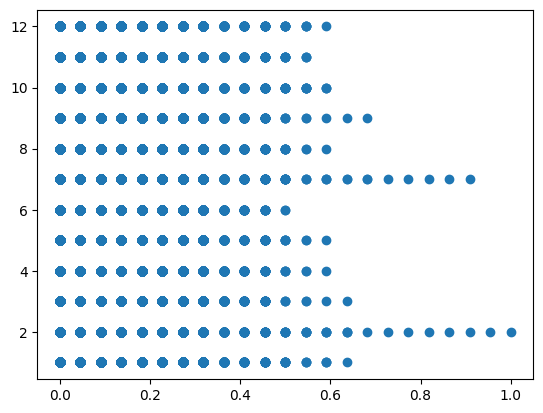

In [62]:
plt.scatter(df_miembros[['P213']], df_miembros[['MES']])

13. Otros tipos de gráficos

    # Diagrama de Regresión
        # sns.regplot(x='‘attribute_1’',y='‘attribute_2’', data=df)
    # Diagrama de Cajas
        # sns.boxplot(x=‘attribute_1’,y=‘attribute_2’, data=df)

14. Otros códigos

    # Agrupando por atributos
        # df_group = df[[‘attribute_1’,’attribute_2’,...]]
    # GroupBy statements
        ## Agrupar por un solo atributo
            # df_group = df_group.groupby(['attribute_1'], as_index=False).mean()
        ## Agrupar por múltiples atributo
            # df_group = df_group.groupby(['attribute_1','attribute_2'],as_index=False).mean()
    # Pivot tables 
        # grouped_pivot = df_group.pivot(index='attribute_1',columns='attribute_2')
    # Pseudocolor plot
        # plt.pcolor(grouped_pivot, cmap='RdBu')
    # Pearson Coefficient and p-value 
        # grouped_pivot = df_group.pivot(index='attribute_1',columns='attribute_2')

15. Otros ejemplos

In [ ]:
# Corregir el tipo de datos
df['colname'].dtypes() # Para observar el tipo de datos
df['colname'].astype() # Para convertir el tipo de datos

    # Ejemplo - Precio: Object -> Int
        df['Price'] = df['Price'].astype('int')

In [ ]:
# Para eliminar datos faltantes (perdidos)
    df.dropna() # Por defecto se elimina la fila
        df.dropna(axis=0) # Elimina toda la fila
        df.dropna(axis=1) # Elimina toda la columna
    # Ejemplo
        df.dropna(subset=["colname"], axis=0, inplace=True)
        df = df.dropna(subset=["colname"], axis=0)

In [ ]:
# Para reemplazar valores faltantes (perdidos)
    df['colname'].replace(missing_value, new_value)
    # Ejemplo - Reemplazar con promedio
        mean = df["colname"].mean()
        df['colname'].replace(np.nan, mean)

In [ ]:
# Aplicar formato a toda la columna
df['colname'] = 9999/df['colname']
df.rename(columns=('colname': 'colname1'), inplace=True)
    # Ejemplo - Metros a Kilómetros
        df['metros'] = df['metros']/1000
        df.rename(columns=('metros': 'kilómetros'), inplace=True)

In [ ]:
# Modelos de normalización de datos
df['colname'] = df['colname']/df['colname'].max() # Método Escalado de características simples
df['colname'] = (df['colname']-df['colname'].min())/(df['colname'].max()-df['colname'].min()) # Método Max-Min
df['colname'] = (df['colname']-df['colname'].mean())/df['colname'].std() # Método Z-score

In [ ]:
# Variable Dummy
    pd.get_dummies(df['colname'])